In [146]:
import pandas as pd
import numpy as np
import tensorflow as tf
keras = tf.keras
from sklearn.preprocessing import RobustScaler
import plotly.graph_objects as go


In [147]:
data_1 = pd.read_csv('../data/diemthi_3_1.csv')
data_2 = pd.read_csv('../data/diemthi_7_1.csv')
data_3 = pd.read_csv('../data/diemthi_7_2.csv')




## pre cleaning data

In [148]:

data_1.columns = data_1.columns.str.strip()
data_2.columns = data_2.columns.str.strip()
data_3.columns = data_3.columns.str.strip()
# rename columns
data_1 = data_1.rename(columns={'Họ Tên': 'ho_ten', 'Thi':'thi'})

In [149]:
# gộp 3 data thành 1
df = pd.concat([data_1, data_2, data_3], axis=0)
df = df.rename(columns={'10%':'cc', '20%':'kt1', '20%.1':'kt2'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 76
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ho_ten  228 non-null    object 
 1   cc      226 non-null    float64
 2   kt1     226 non-null    float64
 3   kt2     226 non-null    float64
 4   thi     224 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


In [150]:
df

,ho_ten,cc,kt1,kt2,thi
0,31_011,8.375,7.250,8.50,9.0
1,31_012,8.250,7.250,8.50,9.0
2,31_013,8.500,7.500,8.50,10.0
3,31_014,4.000,7.250,8.50,9.0
4,31_015,8.750,7.500,8.50,9.5
...,...,...,...,...,...
72,72_151,7.375,6.500,7.50,7.0
73,72_152,7.250,6.750,7.00,7.0
74,72_153,7.125,6.750,6.75,7.0
75,72_154,7.750,6.375,7.50,7.0


## cleaning data

In [151]:

# thay giá trị NaNs ở tất cả các cột với giá trị trung bình ở mỗi cột đó
for (columnName, columnValues) in df.items():
    df[columnName] =  df[columnName].fillna( df[columnName].mean() )

# chuẩn hóa các cột có giá trị số
for (columnName, columnValues) in df.items():
    if columnName != 'ho_ten':
        df[columnName] =  df[columnName]*100

df = df.astype(int)
print(df.dtypes)

ho_ten    int32
cc        int32
kt1       int32
kt2       int32
thi       int32
dtype: object


In [152]:
df

,ho_ten,cc,kt1,kt2,thi
0,31011,837,725,850,900
1,31012,825,725,850,900
2,31013,850,750,850,1000
3,31014,400,725,850,900
4,31015,875,750,850,950
...,...,...,...,...,...
72,72151,737,650,750,700
73,72152,725,675,700,700
74,72153,712,675,675,700
75,72154,775,637,750,700


## select algorithm 


In [153]:
result = []

### kiểm tra mối tương quan giữa các tính năng (các dòng) 

In [154]:
corr = df.corr()
print(corr.head(2))
corr.info()
corr.shape

          ho_ten        cc       kt1       kt2       thi
ho_ten  1.000000  0.156737  0.051766  0.023652 -0.156378
cc      0.156737  1.000000  0.636122  0.652233  0.618699
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, ho_ten to thi
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ho_ten  5 non-null      float64
 1   cc      5 non-null      float64
 2   kt1     5 non-null      float64
 3   kt2     5 non-null      float64
 4   thi     5 non-null      float64
dtypes: float64(5)
memory usage: 412.0+ bytes


(5, 5)

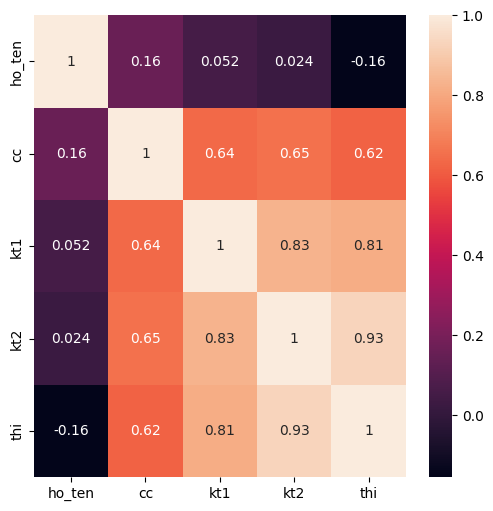

In [155]:
# plot by seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(6,6)

In [156]:
# vì trong bảng có 4 tính năng có giá trị nên chọn cả 4 luôn để tăng tỉ lệ chính xác
print(df.corr().nlargest(4, 'thi').index)
print(df.corr().nlargest(4, 'thi').values[:,3])



Index(['thi', 'kt2', 'kt1', 'cc'], dtype='object')
[0.9288844  1.         0.83177882 0.65223322]


In [157]:
result = []
#---features---
X = df[['kt2','kt1','cc']]
#---label---
y = df.iloc[ : , 4]
    

In [158]:
X

,kt2,kt1,cc
0,850,725,837
1,850,725,825
2,850,750,850
3,850,725,400
4,850,750,875
...,...,...,...
72,750,650,737
73,700,675,725
74,675,675,712
75,750,637,775


In [159]:
y

0      900
1      900
2     1000
3      900
4      950
      ... 
72     700
73     700
74     700
75     700
76     700
Name: thi, Length: 228, dtype: int32

### kiểm tra thuật toán Logistic Regression 

In [160]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean()
print(log_regress_score)
result.append(log_regress_score)

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

0.25513833992094864


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

### kiểm tra thuật toán K-Nearest Neihbors

In [161]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

The optimal number of neighbors is 25
0.41739130434782606


### Support Vector Machines 

In [126]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.6320158102766797
0.6270750988142293


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [127]:
print(result)

[0.583794466403162, 0.6359683794466403, 0.6320158102766797, 0.6270750988142293]


In [128]:
# hoan thanh chon thuat toan toi uu
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.635968
SVM Linear Kernel,0.632016
SVM RBF Kernel,0.627075
Logistic Regression,0.583794


# training  data


In [96]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
    train_size=0.50, test_size=0.50, random_state=30)

NameError: name 'model_selection' is not defined

In [97]:
# linear = svm.SVC(kernel='linear', gamma=0.5, C=0.1).fit(X_train, y_train)
# poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [98]:
# poly_pred = poly.predict(X_test)
# linear_pred = linear.predict(X_test)

In [99]:
# poly_accuracy = accuracy_score(y_test, poly_pred)
# poly_f1 = f1_score(y_test, poly_pred, average='weighted')
# print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
# print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [100]:
# rbf_accuracy = accuracy_score(y_test, linear_pred)
# rbf_f1 = f1_score(y_test, linear_pred, average='weighted')
# print('Accuracy (Linear Kernel): ', "%.2f" % (rbf_accuracy*100))
# print('F1 (Linear Kernel): ', "%.2f" % (rbf_f1*100))

## saving model 

In [101]:
# import pickle
# svm_linear = svm.SVC(kernel='linear', probability=True)
# svm_linear.fit(X, y)

# y_pred = svm_linear.predict(X_test)
# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

# filename = 'PredictTest.sav'
# pickle.dump(svm_linear, open(filename, 'wb'))

# loaded_model = pickle.load( open(filename, 'rb'))
# cc = 6
# kt1 = 6.5
# kt2 = 6.5
# prediction = loaded_model.predict([[cc, kt1, kt2]])
# print("dự đoán điểm kiểm tra: ", prediction)

# proba = loaded_model.predict_proba([[cc, kt1, kt2]])
# print("Proba: ", proba)

In [180]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X, y)
import pickle 
# luu model vao o dia 
filename = 'test_train.sav'

# viet vao file su dung che do nhi phan
pickle.dump(knn, open(filename, 'wb'))

filename

'test_train.sav'

In [181]:
# load model tu o dia 
loaded_model = pickle.load(open(filename, 'rb'))
# 8.50	7.25	8.375
kt2 = 6.5 * 100
kt1 = 4.25 * 100
cc = 4.37 * 100
prediction = loaded_model.predict([[kt2, kt1, cc]])

diemthi = kt2*0.4 + kt1*0.4 + cc*0.2
diemthi = "{:.2f}".format(diemthi/100)
print("dự đoán điểm kiểm tra: ", prediction/100)
print("dthi: ", diemthi)
proba = loaded_model.predict_proba([[kt2, kt1, cc]])
print("Proba: ", proba)
print("Confidence: "+ str(round(np.amax(proba[0]) * 100, 2)) + "%")

dự đoán điểm kiểm tra:  [6.]
dthi:  5.17
Proba:  [[0.   0.16 0.   0.04 0.28 0.04 0.16 0.04 0.08 0.16 0.04 0.   0.   0.
  0.   0.   0.   0.   0.  ]]
Confidence: 28.0%


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [182]:
loaded_model

KNeighborsClassifier(n_neighbors=25)